# Sec3.記述統計

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 分布(distribution)
- sns.displot(x)
- sns.catplot(x, data, kind)

In [2]:
df = sns.load_dataset(name='tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587


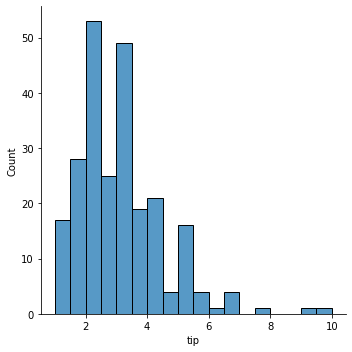

In [3]:
sns.displot(df['tip'], kde=False)

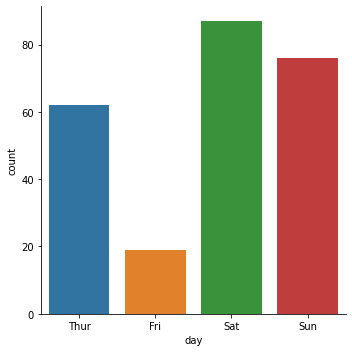

In [4]:
sns.catplot(x='day', data=df, kind='count')

## 代表値

### 平均
- 平均値を求める
  - np.mean()
  - df['column'].mean()
  - df.groupby('column').mean()
- 平均値を描画する
  - sns.barplot(x, y, data)

In [30]:
np.mean(df['tip'])

2.9982786885245902

In [31]:
df['tip'].mean()

2.9982786885245902

In [41]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

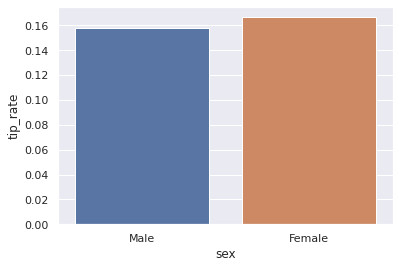

In [40]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

### 中央値
- 中央値を求める
  - np.median()
  - df['column'].median()
  - df.groupby('column').median()
- 中央値を描画する
  - sns.barplot(x, y, data, estimatior=np.median)

In [45]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

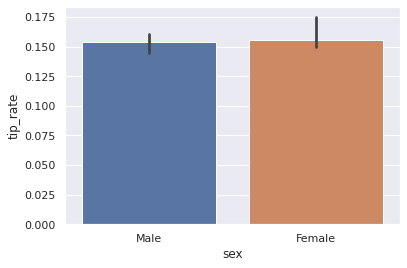

In [44]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median)

### 最頻値(mode)
- 最頻値を求める
  - stats.mode()
  - df['column'].mode()

In [53]:
mode, count = stats.mode(df)

In [56]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [60]:
df['day'].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

## 散布度
- 範囲
- 四分位数
- 偏差

### 範囲(range)
- 最小値、最大値を求める
  - np.min(), np.max()
  - df['column'].min(), df['column'].max()
  - df.groupby('column').min(), df.groupby('column').max()

### 四分位数(qurtile)
- 第一四分位数(Q1), 第二四分位数(Q2), 第三四分位数(Q3)
- **(Q3-Q1):四分位範囲(Q3-Q1)** (IQR: Interquartile range)
- (Q3-Q1)/2:四分位偏差 (QD: quartile deviation)
- 四分位数を求める
  - np.quantile(data, [0.25, 0.5, 0.75])
  - df['column'].quantile([0.25, 0.5, 0.75])
- 四分位範囲を求める
  - stats.iqr()
- 箱ひげ図(box plot)
  - plt.boxplot()
  - sns.boxplot()

In [69]:
np.quantile(df['tip'], [0.25, 0.5, 0.75])
df['tip'].quantile([0.25, 0.5, 0.75])

array([2.    , 2.9   , 3.5625])

In [71]:
stats.iqr(df['tip'])

1.5625

<AxesSubplot:xlabel='size', ylabel='tip_rate'>

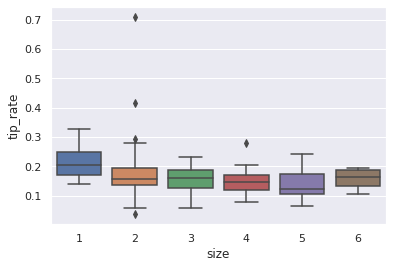

In [78]:
sns.boxplot(x='size', y='tip_rate', data=df)

### 偏差
- 平均偏差(MD: mean deviation)
- 分散(variance)
  - np.var()
- 標準偏差(SD: standard deviation)
  - np.std()

In [79]:
np.var(df['tip_rate'])

0.0037145280013546928

In [80]:
np.std(df['tip_rate'])

0.060946927743362855

# Sec4_2変数間の記述統計
- 共分散
  - 連続変数間の相関関係の強さ
- 相関係数
  - 連続変数間の相関関係の強さを標準化したもの
- 連関係数
  - カテゴリ変数間の相関

## 共分散(covariance)
- 2変数間の相関関係を表す指標
- $S_{xy} = \frac{1}{n}Σ(x_i - \bar{x})(y_i - \bar{y})$
- 共分散行列を求める
  - np.cov(xarray, yarray, bias=True)
  - np.cov(array, bias=True)
    - bias=True にしないと、不偏分散が返ってくる

In [9]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

3つ以上見たい場合

In [14]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

df.cov()でも計算できるが、不偏分散が算出される

In [13]:
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 相関係数(correlation coefficient)
- 共分散を標準化したのが相関係数
- 共分散のとりうる値（最小値～最大値）を計算し、-1~1の範囲にすることを考える
- 共分散のとりうる値は
  - $-S_xS_y <= S_{xy} <= S_xS_y$
    - $S_xS_y$は相関係数最大(y=ax+bのような一次式)、$-S_xS_y$は相関係数最小
  - $-1 <= \frac{S_{xy}}{S_xS_y} <= 1$
- 相関行列を求める
  - np.corrcoef(xarray, yarray)
  - np.corrcoef(array)
  - df.corr()
- 相関行列を描画する
  - sns.heatmap(df.corr())

In [22]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

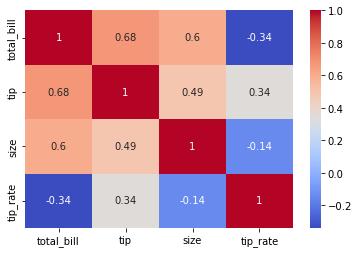

In [28]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 連関(association)
- カテゴリ変数間の相関関係
- 分割表(contingency table)を用いて計算する
- 分割表内の数字を観測度数(observed frequency)という
  - 連関がないと想定した場合の度数を期待度数(expected frequencies)という


## カイ二乗(χ^2: chi squared)
- 観測度数が期待度数からどれくらい離れているかを計算した値
- {(観測度数-期待度数)^2/期待度数}の総和
- 分割表を求める
  - pd.crosstab(xarray, yarray)
- χ^2と期待度数を求める
  - stats.chi2_contingency(cont_table, correction=False)
    - 第一戻り値：χ^2、　第四戻り値：期待度数

In [3]:
cont_table = pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [4]:
stats.chi2_contingency(pd.crosstab(df['sex'], df['time']), correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## クラメールの連関係数
- 連関の強さを表す指標
- χ^2値を0~1に標準化した値

In [6]:
cont_table = pd.crosstab(df['sex'], df['time'])
chi2, _, _, _ =stats.chi2_contingency(pd.crosstab(df['sex'], df['time']), correction=False)


In [18]:
np.sqrt(chi2 / (min(df['sex'].nunique(), df['time'].nunique()) * df['sex'].count()))

0.14512044120766326

In [25]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2, _, _, _ =stats.chi2_contingency(cont_table, correction=False)
    a = ((min(cont_table.shape) - 1) * len(x))
    return np.sqrt(chi2 / a)

In [26]:
cramers_v(df['sex'], df['time'])

0.20523129613344476